In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\rohan\\OneDrive\\Desktop\\leaf dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [3]:
cnn = tf.keras.models.load_model('Improved_trained_model.keras')


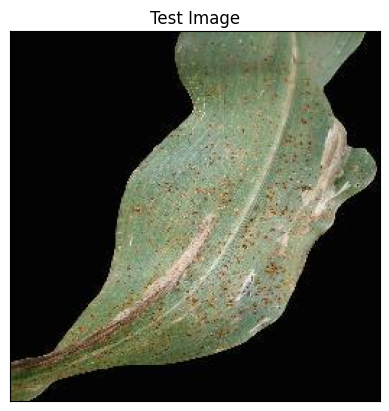

In [9]:
#Test Image Visualization
import cv2
image_path ="C:\\Users\\rohan\\OneDrive\\Desktop\\leaf dataset\\test\\test\\CornCommonRust1.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 84ms/step


In [11]:
print(predictions)


[[7.0809680e-19 8.4329182e-19 6.2398365e-18 5.3240705e-21 2.4319031e-18
  9.8447084e-22 2.0342223e-15 3.8658488e-21 1.0000000e+00 2.3710819e-22
  2.4353133e-23 4.7349763e-24 8.1630448e-22 9.6173947e-21 5.5676786e-26
  5.0802470e-20 1.6589256e-19 2.9242789e-22 7.0766142e-21 5.2434136e-19
  1.1851315e-14 7.4358763e-24 2.0276792e-19 3.2029328e-29 1.2179638e-25
  2.8300609e-23 3.4345964e-20 3.1871540e-26 3.7462765e-23 3.4187703e-14
  5.1989099e-15 2.9409894e-24 1.1220571e-19 3.6767342e-30 6.2225192e-22
  1.9708513e-25 4.6257975e-26 1.9647574e-16]]


In [12]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


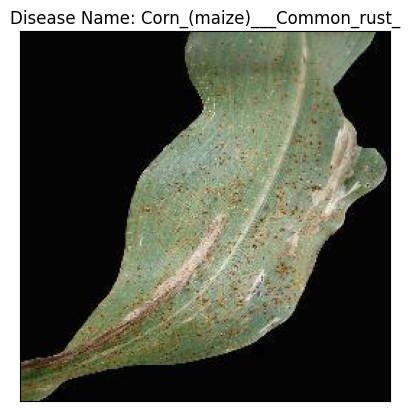

In [13]:

# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

Found 17572 files belonging to 38 classes.
1/1 [==============================] - 0s 227ms/step
[[1.33732925e-09 2.69730982e-12 3.06774268e-08 1.05067347e-05
  5.81950182e-04 2.08877822e-07 9.37770074e-06 6.47717817e-12
  5.47277750e-06 8.65033711e-10 9.96165156e-01 1.45313279e-14
  3.48817746e-11 1.23401954e-15 1.62576148e-15 1.26353686e-03
  4.40911863e-10 7.74341569e-09 1.06224735e-13 8.24797314e-11
  1.37400412e-15 3.38123588e-16 3.00187288e-08 5.15015764e-12
  5.95534333e-09 4.94587227e-12 4.68570901e-14 2.53390766e-08
  4.74787690e-13 1.18644417e-11 1.95945916e-03 4.55096828e-11
  7.47438895e-13 1.54529250e-17 4.91207705e-15 4.29908187e-06
  4.92165943e-12 5.51305757e-09]]
Predicted class index: 10
Predicted class name: Corn_(maize)___healthy


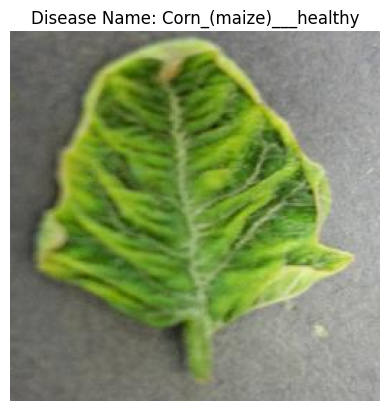

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load the model
model = tf.keras.models.load_model('Improved_trained_model.keras')

# Load validation set to get class names
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\rohan\\OneDrive\\Desktop\\leaf dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_names = validation_set.class_names

# Test image
image_path = "C:\\Users\\rohan\\OneDrive\\Desktop\\leaf dataset\\test\\test\\TomatoYellowCurlVirus6.JPG"

# Preprocess the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (128, 128))
img_array = np.expand_dims(img_resized, axis=0) / 255.0

# Predict
predictions = model.predict(img_array)
print(predictions)
result_index = np.argmax(predictions)
print(f"Predicted class index: {result_index}")
print(f"Predicted class name: {class_names[result_index]}")

# Display the image with prediction
plt.imshow(img)
plt.title(f"Disease Name: {class_names[result_index]}")
plt.axis('off')
plt.show()
